In [ ]:
###Brazilian E-Commerce Public Dataset####

In [ ]:
###CIBA_Assessment - Danielle_Visagie ###

import pandas as pd
import numpy as np
from pathlib import Path

#######################################################################################################################
############ SECTION ONE - DATA ASSEMBLY ##############################################################################
#######################################################################################################################


#1. Load files of core tables and convert into dataframes
Data = Path("/content")

customers = pd.read_csv(Data / 'olist_customers_dataset.csv')
orders = pd.read_csv(Data / 'olist_orders_dataset.csv')
order_items = pd.read_csv(Data / 'olist_order_items_dataset.csv')
products = pd.read_csv(Data / 'olist_products_dataset.csv')
sellers = pd.read_csv(Data / 'olist_sellers_dataset.csv')


#2. Create a modelling-ready table:

#create an empty dataframe with relevant columns
df_processing = pd.DataFrame(columns = ['order_id', 'customer_id', 'product_id', 'customer_state', 'product_category_name', 'total_items', 'price','freight_value','seller_state','order_estimated_delivery_date', 'order_delivered_customer_date'] )

#Merge files based on matching ID information
df_processing = (
    order_items
    .merge(orders, on='order_id', how='left')
    .merge(customers, on='customer_id', how='left')
    .merge(products, on='product_id', how='left')
    .merge(sellers, on='seller_id', how='left')
)

#Select only relevant files
df_processing = df_processing[[
    'order_id',
    'customer_id',
    'product_id',
    'customer_state',
    'product_category_name',
    'order_item_id',  # This might be your 'total_items' or you'll need to aggregate
    'price',
    'freight_value',
    'seller_state',
    'order_estimated_delivery_date',
    'order_delivered_customer_date'
]]

# Calculate total items per order & Merge it into df_processing or (model ready table)
total_items_per_order = order_items.groupby('order_id').size().reset_index(name='total_items')
df_processing = df_processing.merge(total_items_per_order, on='order_id', how='left')

#3. Define the binary target: was the delivery delayed? (Actual delivery date > Estimated delivery date)

# Convert date columns to datetime
df_processing['order_delivered_customer_date'] = pd.to_datetime(df_processing['order_delivered_customer_date'])
df_processing['order_estimated_delivery_date'] = pd.to_datetime(df_processing['order_estimated_delivery_date'])

# Create the binary target column where 1 = delayed, else 0
df_processing['delayed'] = (df_processing['order_delivered_customer_date'] > df_processing['order_estimated_delivery_date']).astype(int)

# Check the distribution
print(df_processing['delayed'].value_counts())
print(f"\nPercentage delayed: {df_processing['delayed'].mean() * 100:.2f}%")




delayed
0    103935
1      8715
Name: count, dtype: int64

Percentage delayed: 7.74%


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_processing

,order_id,customer_id,product_id,customer_state,product_category_name,order_item_id,price,freight_value,seller_state,order_estimated_delivery_date,order_delivered_customer_date,total_items,delayed
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,4244733e06e7ecb4970a6e2683c13e61,RJ,cool_stuff,1,58.90,13.29,SP,2017-09-29,2017-09-20 23:43:48,1,0
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,e5f2d52b802189ee658865ca93d83a8f,SP,pet_shop,1,239.90,19.93,SP,2017-05-15,2017-05-12 16:04:24,1,0
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,c777355d18b72b67abbeef9df44fd0fd,MG,moveis_decoracao,1,199.00,17.87,MG,2018-02-05,2018-01-22 13:19:16,1,0
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,7634da152a4610f1595efa32f14722fc,SP,perfumaria,1,12.99,12.79,SP,2018-08-20,2018-08-14 13:32:39,1,0
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,ac6c3623068f30de03045865e4e10089,SP,ferramentas_jardim,1,199.90,18.14,PR,2017-03-17,2017-03-01 16:42:31,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,b51593916b4b8e0d6f66f2ae24f2673d,4aa6014eceb682077f9dc4bffebc05b0,MA,utilidades_domesticas,1,299.99,43.41,SC,2018-05-18,2018-05-10 22:56:40,1,0
112646,fffcd46ef2263f404302a634eb57f7eb,84c5d4fbaf120aae381fad077416eaa0,32e07fd915822b0765e448c4dd74c828,PR,informatica_acessorios,1,350.00,36.53,SP,2018-08-01,2018-07-23 20:31:55,1,0
112647,fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,72a30483855e2eafc67aee5dc2560482,SP,esporte_lazer,1,99.90,16.95,PR,2017-11-10,2017-10-28 12:22:22,1,0
112648,fffe18544ffabc95dfada21779c9644f,b5e6afd5a41800fdf401e0272ca74655,9c422a519119dcad7575db5af1ba540e,SP,informatica_acessorios,1,55.99,8.72,SP,2017-08-25,2017-08-16 21:59:40,1,0



Top 5 states with highest delay rates:
                total_delayed  total_orders  delay_rate
customer_state                                         
AL                        103           444       0.232
MA                        163           824       0.198
SE                         61           385       0.158
PI                         81           542       0.149
CE                        218          1478       0.147

Top products with highest delay rates:
                                total_delayed  total_orders  delay_rate
product_category_name                                                  
audio                                      46           364       0.126
fashion_underwear_e_moda_praia             16           131       0.122
artigos_de_natal                           18           153       0.118
livros_tecnicos                            29           267       0.109
casa_conforto                              44           434       0.101
Correlation between frei

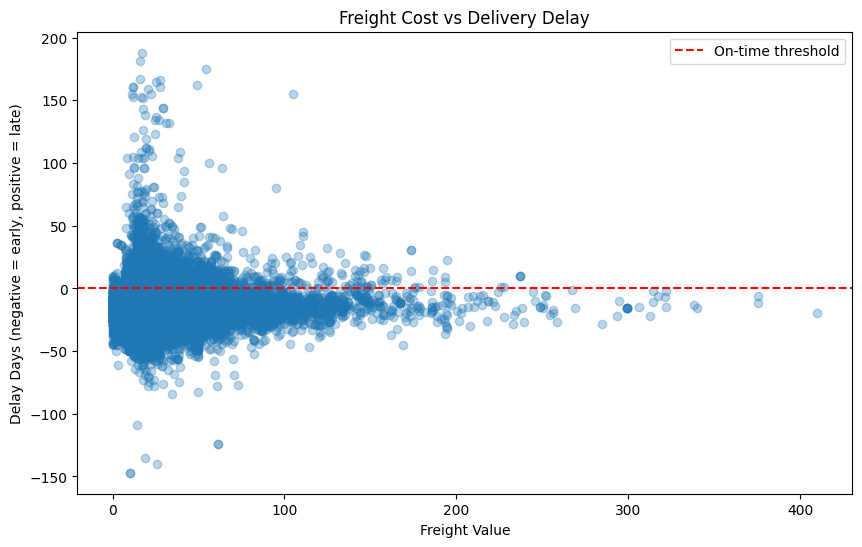

Monthly volume of orders delivered according to actual delivered date:
order_delivered_customer_date
2016-10     245
2016-11      74
2016-12       4
2017-01     326
2017-02    1565
2017-03    2724
2017-04    2072
2017-05    4201
2017-06    3640
2017-07    3933
2017-08    4900
2017-09    4496
2017-10    5215
2017-11    5412
2017-12    8319
2018-01    7419
2018-02    6623
2018-03    7948
2018-04    8999
2018-05    8166
2018-06    7887
2018-07    6581
2018-08    9385
2018-09      59
2018-10       3
Freq: M, dtype: int64
Monthly delay rate of orders delivered according to actual delivered date:
order_delivered_customer_date
2016-10    0.000000
2016-11    0.054054
2016-12    0.500000
2017-01    0.000000
2017-02    0.001917
2017-03    0.025698
2017-04    0.060811
2017-05    0.057129
2017-06    0.035440
2017-07    0.038393
2017-08    0.026122
2017-09    0.041593
2017-10    0.047939
2017-11    0.049889
2017-12    0.103979
2018-01    0.099070
2018-02    0.063264
2018-03    0.156266
2018-04    0

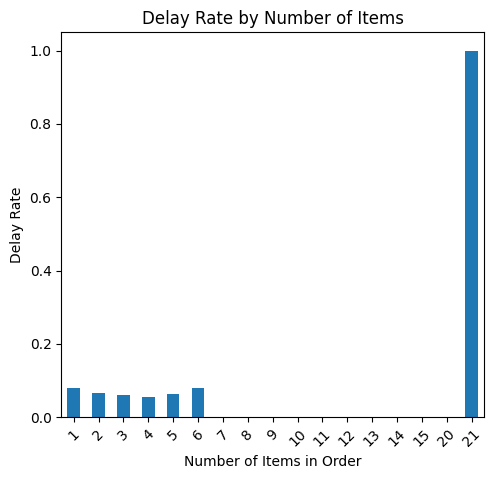

In [ ]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
#######################################################################################################################
############ SECTION TWO - EXPLORATORY ANALYSIS #######################################################################
#######################################################################################################################

#======================================================================================================
#1. Which states have the highest delay rates?
#======================================================================================================

#Sort by customer state - count delays
delay_by_state = df_processing.groupby('customer_state').agg({
    'delayed': ['sum', 'count', 'mean']
}).round(3)

delay_by_state.columns = ['total_delayed', 'total_orders', 'delay_rate']
delay_by_state = delay_by_state.sort_values('delay_rate', ascending=False)

print("\nTop 5 states with highest delay rates:")
print(delay_by_state.head(5))

#======================================================================================================
#2. Which products are most prone to delays?
#======================================================================================================
# Sort by products and count by delays
delay_by_product = df_processing.groupby('product_category_name').agg({
    'delayed': ['sum', 'count', 'mean']
}).round(3)

delay_by_product.columns = ['total_delayed', 'total_orders', 'delay_rate']
delay_by_product = delay_by_product.sort_values('delay_rate', ascending=False)
#print(delay_by_product)

# Some products have minimal orders - how accurate will the delay rate be then? Add an optional filter (depending on relevance), e.g., minimum threshold of orders 50
delay_by_product = delay_by_product[delay_by_product['total_orders'] >= 50]
print("\nTop products with highest delay rates:")
print(delay_by_product.head(5))

#======================================================================================================
#3. Does freight cost correlate with delivery speed?
#======================================================================================================

# Calculate how many days it was delayed (or delivered early)
df_processing['delay_days'] = (df_processing['order_delivered_customer_date'] -
                                df_processing['order_estimated_delivery_date']).dt.days

# Correlation between freight cost and delay
correlation = df_processing[['freight_value', 'delay_days']].corr()
print("Correlation between freight cost and delay days:")
print(correlation)


plt.figure(figsize=(10, 6))
plt.scatter(df_processing['freight_value'], df_processing['delay_days'], alpha=0.3)
plt.xlabel('Freight Value')
plt.ylabel('Delay Days (negative = early, positive = late)')
plt.title('Freight Cost vs Delivery Delay')
plt.axhline(y=0, color='r', linestyle='--', label='On-time threshold')
plt.legend()
plt.show()

#Correlation = -0.0402, very weak correlation between freight value and the number of delayed days ( or delivered early)

#======================================================================================================
#4. Do orders with multiple items get delayed more often?
#======================================================================================================

#Link number of items purchased vs delay rate

delay_by_items = df_processing.groupby('total_items').agg({
    'delayed': ['sum', 'count', 'mean']
}).round(3)

delay_by_items.columns = ['total_delayed', 'total_orders', 'delay_rate']
#print("\nDelay rate by number of items in order:")
#print(delay_by_items)

# Average number of items: delayed vs on-time
#print("\nAverage items per order:")
#print(df_processing.groupby('delayed')['total_items'].mean())

# Delay rate by number of items
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
delay_by_items['delay_rate'].plot(kind='bar')
plt.xlabel('Number of Items in Order')
plt.ylabel('Delay Rate')
plt.title('Delay Rate by Number of Items')
plt.xticks(rotation=45)

#Orders with a higher number of items (7-20 items) have no delay. Orders with a lower number of items (1-6 items) experience a delay (with an overall average delay rate of 0.054), which is not significantly high. There is an outlier at 21 items with all orders experiencing a delay. This requires further investigation.

#======================================================================================================
#5. Seasonality: Monthly volume and monthly delay rate
#======================================================================================================

Monthly_volume = df_processing.groupby(df_processing['order_delivered_customer_date'].dt.to_period('M')).size()
print("Monthly volume of orders delivered according to actual delivered date:")
print(Monthly_volume)

Monthly_delay_rate = df_processing.groupby(df_processing['order_delivered_customer_date'].dt.to_period('M'))['delayed'].mean()
print("Monthly delay rate of orders delivered according to actual delivered date:")
print(Monthly_delay_rate)

#6. Customer behaviour: Average order size by state & Repeat customer patterns
Avg_ordersize = df_processing.groupby('customer_state')['total_items'].mean()
print("Avergae number of items per order for each state:")
print(Avg_ordersize)

#Do repeat customers order the same or how often???


Missing values before cleaning:
customer_state              0
product_category_name    1603
total_items                 0
price                       0
freight_value               0
seller_state                0
delayed                     0
dtype: int64

Missing values after cleaning:
customer_state           0
product_category_name    0
total_items              0
price                    0
freight_value            0
seller_state             0
delayed                  0
dtype: int64

Basic Metrics
Accuracy:  0.610
F1 score:  0.168
ROC AUC:   0.586

Confusion Matrix
[[12670  7826]
 [  839   875]]

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.62      0.75     20496
           1       0.10      0.51      0.17      1714

    accuracy                           0.61     22210
   macro avg       0.52      0.56      0.46     22210
weighted avg       0.87      0.61      0.70     22210

                 feature  coefficient
  custom

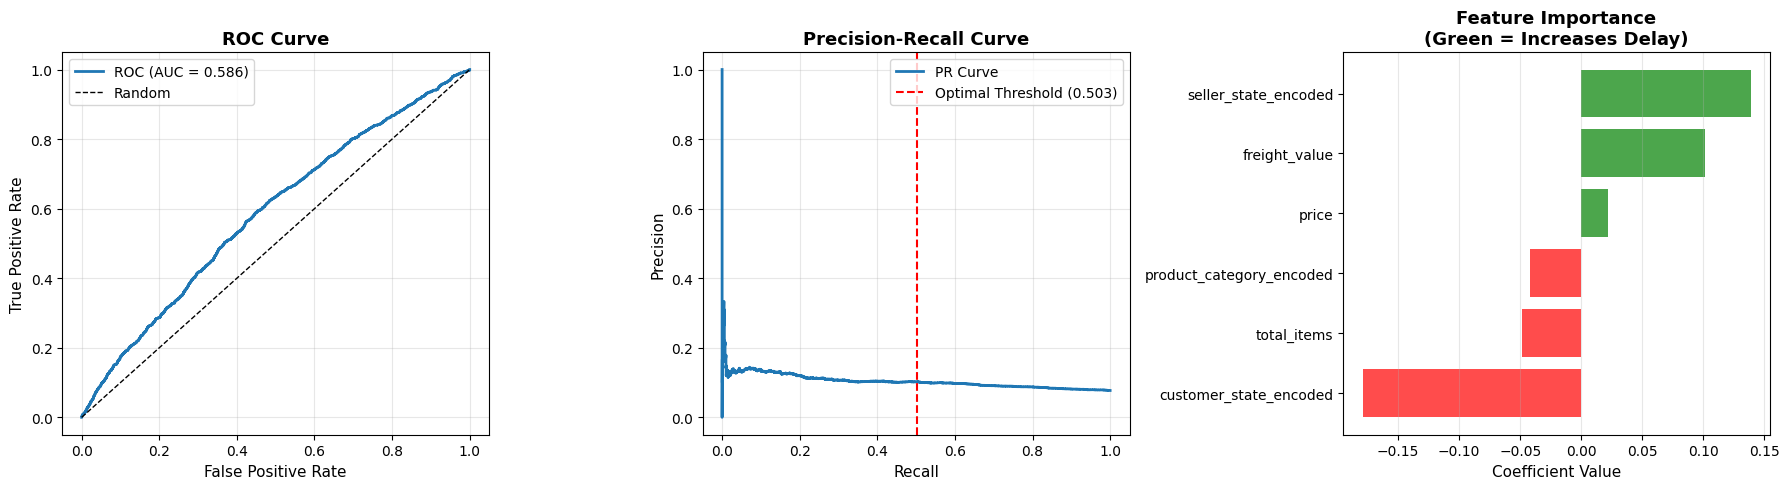


SUMMARY
Model trained on 88837 samples, tested on 22210 samples
Class distribution in test set: {0: np.int64(20496), 1: np.int64(1714)}

Best performing threshold: 0.503
Improvement in F1 score: 1.4%


In [ ]:
#######################################################################################################################
############ SECTION THREE - PREDICTIVE MODELLING #####################################################################
#######################################################################################################################


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import (accuracy_score, f1_score, roc_auc_score,
                             confusion_matrix, classification_report,
                             roc_curve, precision_recall_curve)

#Create predictive modeling table
df_model = df_processing.copy()

# Identify features and target (target is whether the delivery is delayed or not (0 or 1))
features = ['customer_state', 'product_category_name', 'total_items',
            'price', 'freight_value', 'seller_state']
target = 'delayed'

#Remove missing values, i.e., orders that have not been delivered
print("Missing values before cleaning:")
print(df_model[features + [target]].isnull().sum())
df_model = df_model.dropna(subset=features + [target])

print("\nMissing values after cleaning:") #check for remaining missing values after clean
print(df_model[features + [target]].isnull().sum())

#Encoding categorical variables
le_customer = LabelEncoder()
le_product = LabelEncoder()
le_seller = LabelEncoder()

df_model['customer_state_encoded'] = le_customer.fit_transform(df_model['customer_state'])
df_model['product_category_encoded'] = le_product.fit_transform(df_model['product_category_name'])
df_model['seller_state_encoded'] = le_seller.fit_transform(df_model['seller_state'])

#Final modeling dataset
X = df_model[['customer_state_encoded', 'product_category_encoded',
              'total_items', 'price', 'freight_value', 'seller_state_encoded']]
y = df_model['delayed']

#Split dataset into two for training (0.8) and testing (0.2)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1,stratify=y)

#Train model
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# 1. Instantiate and fit the model
log_reg = LogisticRegression(
    max_iter=1000,      # bump this to avoid convergence warnings
    n_jobs=-1,          # use all cores (optional)
    class_weight='balanced',# uncomment if you have class imbalance
    random_state = 1
)

log_reg.fit(X_train, y_train)

# 2. Predict labels and probabilities on the test set
y_pred = log_reg.predict(X_test)                     # hard class labels (0/1)
y_proba = log_reg.predict_proba(X_test)[:, 1]        # probability for class "1"

# 3. Basic metrics
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)                        # binary F1 (positive class = 1)
auc = roc_auc_score(y_test, y_proba)                 # ROC AUC uses probabilities

print("\n" + "=" * 60)
print("Basic Metrics")
print("=" * 60)

print(f"Accuracy:  {acc:.3f}")
print(f"F1 score:  {f1:.3f}")
print(f"ROC AUC:   {auc:.3f}")

# 4. Confusion matrix & classification report
print("\nConfusion Matrix")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report")
report = classification_report(y_test, y_pred, zero_division=0)
print(report)

# After fitting, examine which features matter most
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'coefficient': log_reg.coef_[0]
}).sort_values('coefficient', key=abs, ascending=False)
print(feature_importance[['feature', 'coefficient']].to_string(index=False))


# ============================================================================
# THRESHOLD OPTIMIZATION
# ============================================================================

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)
f1_scores = 2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1] + recalls[:-1] + 1e-10)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold:.3f}")
print(f"Optimal F1 Score:  {f1_scores[optimal_idx]:.3f}")

# Apply optimal threshold
y_pred_optimized = (y_proba >= optimal_threshold).astype(int)
acc_opt = accuracy_score(y_test, y_pred_optimized)
f1_opt = f1_score(y_test, y_pred_optimized)

print(f"\nPerformance with Optimal Threshold:")
print(f"Accuracy:  {acc_opt:.3f}")
print(f"F1 Score:  {f1_opt:.3f}")

print("\nOptimized Confusion Matrix")
print(confusion_matrix(y_test, y_pred_optimized))

#=============================================================================
# VISUALIZATIONS
# ============================================================================
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
axes[0].plot(fpr, tpr, linewidth=2, label=f'ROC (AUC = {auc:.3f})')
axes[0].plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random')
axes[0].set_xlabel('False Positive Rate', fontsize=11)
axes[0].set_ylabel('True Positive Rate', fontsize=11)
axes[0].set_title('ROC Curve', fontsize=13, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(alpha=0.3)

# 2. Precision-Recall Curve
axes[1].plot(recalls, precisions, linewidth=2, label='PR Curve')
axes[1].axvline(recalls[optimal_idx], color='r', linestyle='--',
                linewidth=1.5, label=f'Optimal Threshold ({optimal_threshold:.3f})')
axes[1].set_xlabel('Recall', fontsize=11)
axes[1].set_ylabel('Precision', fontsize=11)
axes[1].set_title('Precision-Recall Curve', fontsize=13, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(alpha=0.3)

# 3. Feature Importance
features_sorted = feature_importance.sort_values('coefficient', ascending=True)
colors = ['red' if x < 0 else 'green' for x in features_sorted['coefficient']]
axes[2].barh(features_sorted['feature'], features_sorted['coefficient'], color=colors, alpha=0.7)
axes[2].set_xlabel('Coefficient Value', fontsize=11)
axes[2].set_title('Feature Importance\n(Green = Increases Delay)',
                  fontsize=13, fontweight='bold')
axes[2].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# SUMMARY
# ============================================================================
print("\n" + "=" * 60)
print("SUMMARY")
print("=" * 60)
print(f"Model trained on {len(X_train)} samples, tested on {len(X_test)} samples")
print(f"Class distribution in test set: {dict(pd.Series(y_test).value_counts())}")
print(f"\nBest performing threshold: {optimal_threshold:.3f}")
print(f"Improvement in F1 score: {((f1_opt - f1) / f1 * 100):.1f}%")









Section 3: Predictive Modelling

1. Which features matter the most?

The customer state (coefficient value = -0.179109): the state of the customer can reduce the risk of delay in delivery.
The seller state (coefficient value = 0.138639): the seller state can increase the risk of delay in delivery.
and the freight value (0.101348): the higher freight value or shipping costs can increase the risk of delay in delivery.


2. Does adding freight value hurt or improve performance?

The freight value is the third most influential feature in the first model, while it is still small, with a coefficient of 0.101348. A comparison test was done where the model was tested without adding freight value in. The change in performance metrics is not significant. Accuracy decreases from 0.622 with freight value to 0.601 without freight; F1 changes from 0.170 to 0.168 respectively and ROC from 0.586029 to 0.580750 respectively. Adding or removing freight value does not significantly hurt or improve performance but may be considered to be included in the model for overall completeness.

3. What is the biggest cause of misclassification?

The model struggles to correctly predict and identify whether an order will be delayed. The precision and recall values are 0.10 and 0.51 respectively. The model cannot struggles predict whether others will be delayed and struggles to identify delayed orders. There 7826 (35%) false positives of delays and 839 missed order delays (3.8%). The model sees better scores in identifying and predicting an order not being delay with a precision and recall of 0.94 and 0.62 respectively.

4. Would a business acually trust this model? Why or why not?

A business would not trust this model. The performance metrics are poor with the precision at 0.1, F1 at 0.17 and ROC AUC at 0.586.This would have poor effects on operational efficiency with in the company (e.g., addressing false positive delays means wasted money, time and resources within in the company) and customer trust, convience (informing customers of a delay when there is nod delay). The ROC AUC of 0.586 suggests that the classifer is no better than random guessing. Ultimately, it is a poor model that requires additional features around delayed orders to improve accuracy.

MODEL WITHOUT freight_value
BASELINE PERFORMANCE (threshold = 0.5)
Accuracy:  0.614
F1 Score:  0.167
ROC AUC:   0.581

Confusion Matrix
[[12783  7713]
 [  853   861]]

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.62      0.75     20496
           1       0.10      0.50      0.17      1714

    accuracy                           0.61     22210
   macro avg       0.52      0.56      0.46     22210
weighted avg       0.87      0.61      0.70     22210


FEATURE IMPORTANCE
                 feature  coefficient
  customer_state_encoded    -0.199413
    seller_state_encoded     0.128245
                   price     0.062558
             total_items    -0.049462
product_category_encoded    -0.040491

THRESHOLD OPTIMIZATION
Optimal Threshold: 0.497
Optimal F1 Score:  0.168

Performance with Optimal Threshold:
Accuracy:  0.601
F1 Score:  0.168

Optimized Confusion Matrix
[[12455  8041]
 [  818   896]]


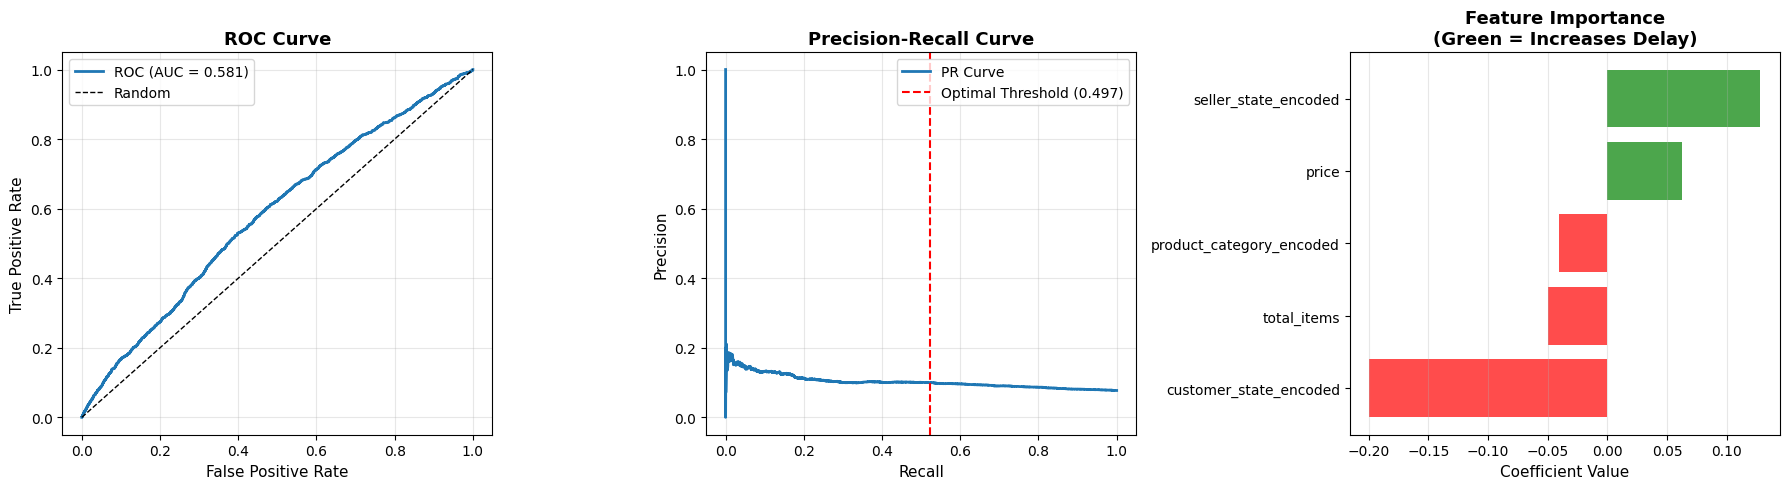


SUMMARY
Model trained on 88837 samples, tested on 22210 samples
Features used: 5 (excluded freight_value)
Class distribution in test set: {0: np.int64(20496), 1: np.int64(1714)}

Best performing threshold: 0.497
Improvement in F1 score: 0.5%


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, f1_score, roc_auc_score,
                             confusion_matrix, classification_report,
                             roc_curve, precision_recall_curve)

# Final modeling dataset WITHOUT freight_value
X = df_model[['customer_state_encoded', 'product_category_encoded',
              'total_items', 'price', 'seller_state_encoded']]
y = df_model['delayed']

# Split dataset into training (0.8) and testing (0.2)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# Scale features
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Train model with balanced class weights
log_reg = LogisticRegression(
    max_iter=1000,
    n_jobs=-1,
    class_weight='balanced',
    random_state=1
)
log_reg.fit(X_train_scaled, y_train)

# Predict labels and probabilities
y_pred = log_reg.predict(X_test_scaled)
y_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

# ============================================================================
# BASIC METRICS
# ============================================================================
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

print("=" * 60)
print("MODEL WITHOUT freight_value")
print("=" * 60)
print("BASELINE PERFORMANCE (threshold = 0.5)")
print("=" * 60)
print(f"Accuracy:  {acc:.3f}")
print(f"F1 Score:  {f1:.3f}")
print(f"ROC AUC:   {auc:.3f}")

print("\nConfusion Matrix")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report")
print(classification_report(y_test, y_pred, zero_division=0))

# ============================================================================
# FEATURE IMPORTANCE
# ============================================================================
print("\n" + "=" * 60)
print("FEATURE IMPORTANCE")
print("=" * 60)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'coefficient': log_reg.coef_[0],
    'abs_coefficient': np.abs(log_reg.coef_[0])
}).sort_values('abs_coefficient', ascending=False)

print(feature_importance[['feature', 'coefficient']].to_string(index=False))

# ============================================================================
# THRESHOLD OPTIMIZATION
# ============================================================================
print("\n" + "=" * 60)
print("THRESHOLD OPTIMIZATION")
print("=" * 60)

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)
f1_scores = 2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1] + recalls[:-1] + 1e-10)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold:.3f}")
print(f"Optimal F1 Score:  {f1_scores[optimal_idx]:.3f}")

# Apply optimal threshold
y_pred_optimized = (y_proba >= optimal_threshold).astype(int)
acc_opt = accuracy_score(y_test, y_pred_optimized)
f1_opt = f1_score(y_test, y_pred_optimized)

print(f"\nPerformance with Optimal Threshold:")
print(f"Accuracy:  {acc_opt:.3f}")
print(f"F1 Score:  {f1_opt:.3f}")

print("\nOptimized Confusion Matrix")
print(confusion_matrix(y_test, y_pred_optimized))

# ============================================================================
# VISUALIZATIONS
# ============================================================================
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
axes[0].plot(fpr, tpr, linewidth=2, label=f'ROC (AUC = {auc:.3f})')
axes[0].plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random')
axes[0].set_xlabel('False Positive Rate', fontsize=11)
axes[0].set_ylabel('True Positive Rate', fontsize=11)
axes[0].set_title('ROC Curve', fontsize=13, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(alpha=0.3)

# 2. Precision-Recall Curve
axes[1].plot(recalls, precisions, linewidth=2, label='PR Curve')
axes[1].axvline(recalls[optimal_idx], color='r', linestyle='--',
                linewidth=1.5, label=f'Optimal Threshold ({optimal_threshold:.3f})')
axes[1].set_xlabel('Recall', fontsize=11)
axes[1].set_ylabel('Precision', fontsize=11)
axes[1].set_title('Precision-Recall Curve', fontsize=13, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(alpha=0.3)

# 3. Feature Importance
features_sorted = feature_importance.sort_values('coefficient', ascending=True)
colors = ['red' if x < 0 else 'green' for x in features_sorted['coefficient']]
axes[2].barh(features_sorted['feature'], features_sorted['coefficient'], color=colors, alpha=0.7)
axes[2].set_xlabel('Coefficient Value', fontsize=11)
axes[2].set_title('Feature Importance\n(Green = Increases Delay)',
                  fontsize=13, fontweight='bold')
axes[2].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# SUMMARY
# ============================================================================
print("\n" + "=" * 60)
print("SUMMARY")
print("=" * 60)
print(f"Model trained on {len(X_train)} samples, tested on {len(X_test)} samples")
print(f"Features used: {len(X.columns)} (excluded freight_value)")
print(f"Class distribution in test set: {dict(pd.Series(y_test).value_counts())}")
print(f"\nBest performing threshold: {optimal_threshold:.3f}")
print(f"Improvement in F1 score: {((f1_opt - f1) / f1 * 100):.1f}%")

Section 4: Feature Reasoning

1.	Three features that logically affect delivery delays

a) Distance between seller state and customer state
b) The time of the year - weather can impact delivery efficiency, is it a holiday season? Christmas often includes higher influx of orders and could ultimately lead to a delay.
c) Access to infrastructure within the region or state it is being delivered too.

2.	Two features you would engineer if you had more time

a) Using the geolocation dataset, calculating the actual distance between the customer delivery location and the seller state (and identifying which seller states ship mostly to which customer states)
b) Mapping or identifying the relationship between the seller state, the logistics handler and the customer. Is the delay from seller itself? Or the logistics partner? If it is the logistics partner, what routes are often most delayed?

3.	One feature you think will not matter at all

The price of the order. Aside from the order price having the lowest feature coefficient (0.022209), it does not necessarily impact the actually delivery of the item. It seems potentially redundant with the freight_value feature, where  freight_value captures not only the price but potentially the shipping value and additional costs that are involved in the delivery of the order.

GEOGRAPHIC DELAY RATE ANALYSIS

--- DELAY RATES BY CUSTOMER STATE ---

Top 10 States with HIGHEST Delay Rates:
                total_orders  delays  delay_rate_pct
customer_state                                      
AL                       440     102            23.2
MA                       813     163            20.0
SE                       383      61            15.9
PI                       535      80            15.0
CE                      1460     211            14.5
BA                      3739     498            13.3
RJ                     14355    1812            12.6
TO                       310      38            12.3
PA                      1061     130            12.3
ES                      2238     268            12.0


Top 10 States with LOWEST Delay Rates:
                total_orders  delays  delay_rate_pct
customer_state                                      
DF                      2373     174             7.3
RS                      6136     413             6.7


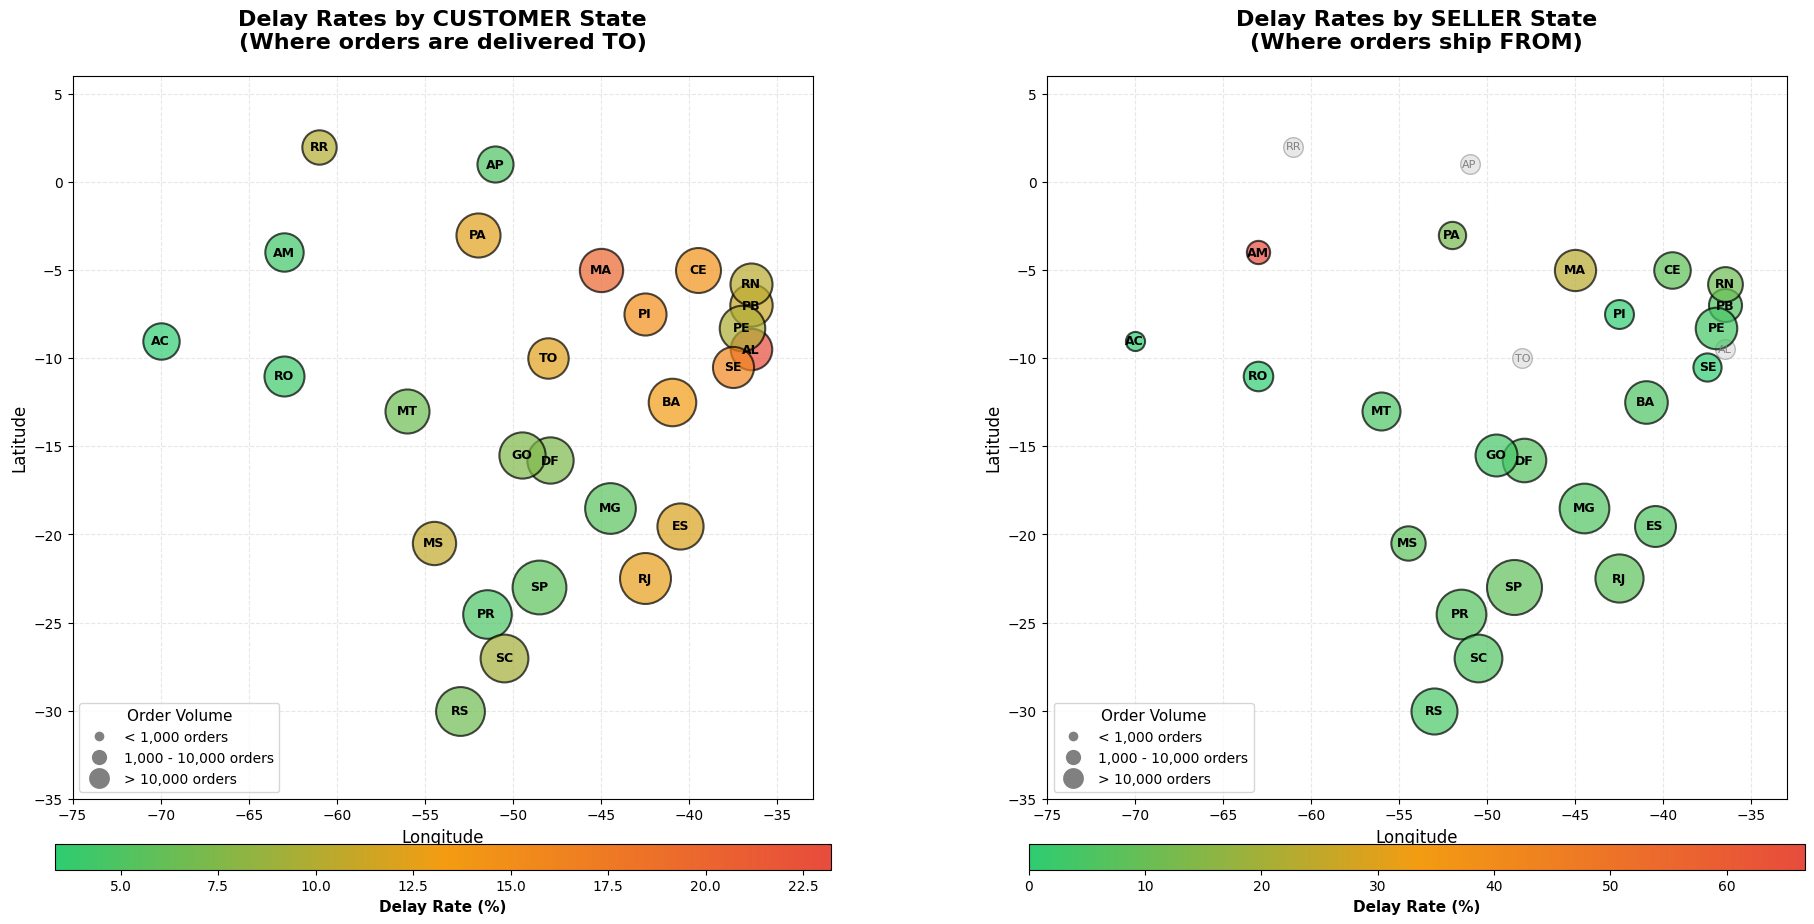

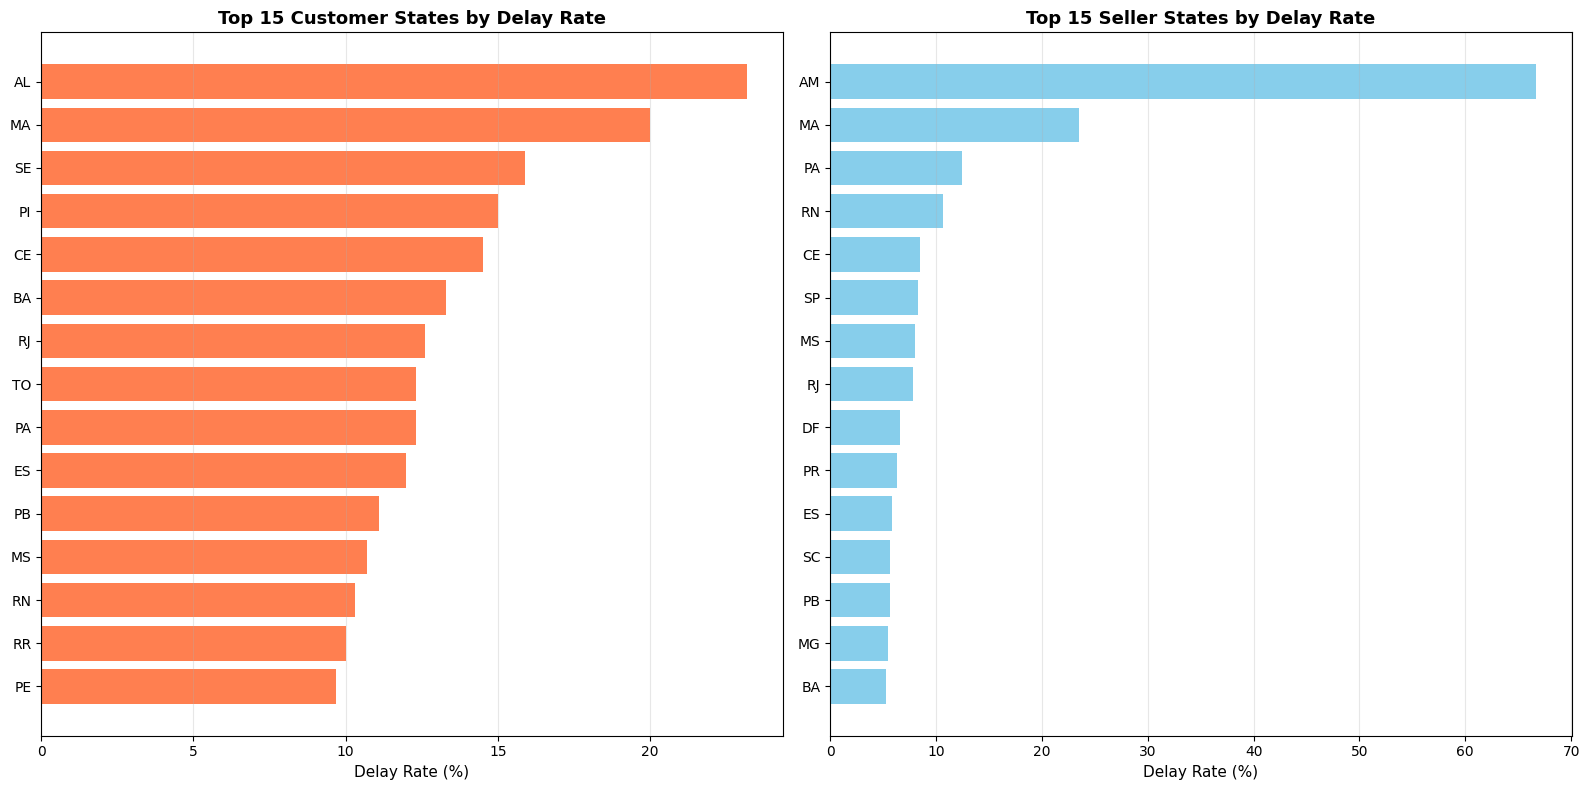


GEOGRAPHIC INSIGHTS FROM MAPS

Top 5 HIGHEST Delay Rate Customer States:
  AL (Northeast): 23.2% delay rate (440 orders)
  MA (Northeast): 20.0% delay rate (813 orders)
  SE (Northeast): 15.9% delay rate (383 orders)
  PI (Northeast): 15.0% delay rate (535 orders)
  CE (Northeast): 14.5% delay rate (1460 orders)

Top 5 LOWEST Delay Rate Customer States:
  AP (North): 4.9% delay rate (82 orders)
  PR (South): 4.7% delay rate (5661 orders)
  AM (North): 4.3% delay rate (163 orders)
  RO (North): 4.0% delay rate (272 orders)
  AC (North): 3.3% delay rate (90 orders)


Top 5 HIGHEST Delay Rate Seller States:
  AM (North): 66.7% delay rate (3 orders)
  MA (Northeast): 23.5% delay rate (405 orders)
  PA (North): 12.5% delay rate (8 orders)
  RN (Northeast): 10.7% delay rate (56 orders)
  CE (Northeast): 8.5% delay rate (94 orders)

Top 5 LOWEST Delay Rate Seller States:
  GO (Central-West): 3.9% delay rate (510 orders)
  AC (North): 0.0% delay rate (1 orders)
  PI (Northeast): 0.0% delay ra

In [ ]:
##################################################################################################
################### OPTIONAL TASK: GEOGRAPHIC MAP OF DELAY RATES #################################
##################################################################################################


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

print("=" * 70)
print("GEOGRAPHIC DELAY RATE ANALYSIS")
print("=" * 70)

# ============================================================================
# Calculate delay rates by state
# ============================================================================
customer_delay = df_model.groupby('customer_state').agg({
    'delayed': ['sum', 'count', 'mean']
})
customer_delay.columns = ['delays', 'total_orders', 'delay_rate']
customer_delay['delay_rate_pct'] = (customer_delay['delay_rate'] * 100).round(1)

seller_delay = df_model.groupby('seller_state').agg({
    'delayed': ['sum', 'count', 'mean']
})
seller_delay.columns = ['delays', 'total_orders', 'delay_rate']
seller_delay['delay_rate_pct'] = (seller_delay['delay_rate'] * 100).round(1)


# Print statistics
print("\n--- DELAY RATES BY CUSTOMER STATE ---\n")
customer_delay_sorted = customer_delay.sort_values('delay_rate', ascending=False)
print("Top 10 States with HIGHEST Delay Rates:")
print(customer_delay_sorted.head(10)[['total_orders', 'delays', 'delay_rate_pct']].to_string())
print("\n\nTop 10 States with LOWEST Delay Rates:")
print(customer_delay_sorted.tail(10)[['total_orders', 'delays', 'delay_rate_pct']].to_string())

print("\n" + "=" * 70)
print("--- DELAY RATES BY SELLER STATE ---\n")
seller_delay_sorted = seller_delay.sort_values('delay_rate', ascending=False)
print("Top 10 Seller States with HIGHEST Delay Rates:")
print(seller_delay_sorted.head(10)[['total_orders', 'delays', 'delay_rate_pct']].to_string())
print("\n\nTop 10 Seller States with LOWEST Delay Rates:")
print(seller_delay_sorted.tail(10)[['total_orders', 'delays', 'delay_rate_pct']].to_string())

# FIGURE 1: Geographic Maps
# Brazilian state coordinates
state_coords = {
    # North
    'AC': (-70.0, -9.0), 'AP': (-51.0, 1.0), 'AM': (-63.0, -4.0),
    'PA': (-52.0, -3.0), 'RO': (-63.0, -11.0), 'RR': (-61.0, 2.0), 'TO': (-48.0, -10.0),
    # Northeast
    'AL': (-36.5, -9.5), 'BA': (-41.0, -12.5), 'CE': (-39.5, -5.0),
    'MA': (-45.0, -5.0), 'PB': (-36.5, -7.0), 'PE': (-37.0, -8.3),
    'PI': (-42.5, -7.5), 'RN': (-36.5, -5.8), 'SE': (-37.5, -10.5),
    # Central-West
    'DF': (-47.9, -15.8), 'GO': (-49.5, -15.5), 'MT': (-56.0, -13.0), 'MS': (-54.5, -20.5),
    # Southeast
    'ES': (-40.5, -19.5), 'MG': (-44.5, -18.5), 'RJ': (-42.5, -22.5), 'SP': (-48.5, -23.0),
    # South
    'PR': (-51.5, -24.5), 'RS': (-53.0, -30.0), 'SC': (-50.5, -27.0)
}

# Brazilian regions for reference
regions = {
    'North': ['AC', 'AP', 'AM', 'PA', 'RO', 'RR', 'TO'],
    'Northeast': ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'],
    'Central-West': ['DF', 'GO', 'MT', 'MS'],
    'Southeast': ['ES', 'MG', 'RJ', 'SP'],
    'South': ['PR', 'RS', 'SC']
}

fig1, axes1 = plt.subplots(1, 2, figsize=(20, 10))

# Color map from green (low delay) to red (high delay)
cmap = LinearSegmentedColormap.from_list('delay', ['#2ecc71', '#f39c12', '#e74c3c'])

# MAP 1: Customer State Delay Rates
ax1 = axes1[0]
ax1.set_xlim(-75, -33)
ax1.set_ylim(-35, 6)
ax1.set_aspect('equal')
ax1.set_title('Delay Rates by CUSTOMER State\n(Where orders are delivered TO)',
              fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel('Longitude', fontsize=12)
ax1.set_ylabel('Latitude', fontsize=12)

all_rates = customer_delay['delay_rate_pct'].values
vmin, vmax = all_rates.min(), all_rates.max()

for state, (lon, lat) in state_coords.items():
    if state in customer_delay.index:
        delay_rate = customer_delay.loc[state, 'delay_rate_pct']
        total_orders = customer_delay.loc[state, 'total_orders']

        norm_rate = (delay_rate - vmin) / (vmax - vmin) if vmax > vmin else 0.5
        color = cmap(norm_rate)
        size = 100 + np.log10(total_orders + 1) * 300

        ax1.scatter(lon, lat, s=size, c=[color], alpha=0.7,
                   edgecolors='black', linewidths=1.5, zorder=3)
        ax1.text(lon, lat, state, fontsize=9, ha='center', va='center',
                fontweight='bold', zorder=4)
    else:
        ax1.scatter(lon, lat, s=200, c='lightgray', alpha=0.5,
                   edgecolors='gray', linewidths=1, zorder=2)
        ax1.text(lon, lat, state, fontsize=8, ha='center', va='center',
                color='gray', zorder=4)

ax1.grid(True, alpha=0.3, linestyle='--')

# MAP 2: Seller State Delay Rates
ax2 = axes1[1]
ax2.set_xlim(-75, -33)
ax2.set_ylim(-35, 6)
ax2.set_aspect('equal')
ax2.set_title('Delay Rates by SELLER State\n(Where orders ship FROM)',
              fontsize=16, fontweight='bold', pad=20)
ax2.set_xlabel('Longitude', fontsize=12)
ax2.set_ylabel('Latitude', fontsize=12)

seller_rates = seller_delay['delay_rate_pct'].values
vmin_s, vmax_s = seller_rates.min(), seller_rates.max()

for state, (lon, lat) in state_coords.items():
    if state in seller_delay.index:
        delay_rate = seller_delay.loc[state, 'delay_rate_pct']
        total_orders = seller_delay.loc[state, 'total_orders']

        norm_rate = (delay_rate - vmin_s) / (vmax_s - vmin_s) if vmax_s > vmin_s else 0.5
        color = cmap(norm_rate)
        size = 100 + np.log10(total_orders + 1) * 300

        ax2.scatter(lon, lat, s=size, c=[color], alpha=0.7,
                   edgecolors='black', linewidths=1.5, zorder=3)
        ax2.text(lon, lat, state, fontsize=9, ha='center', va='center',
                fontweight='bold', zorder=4)
    else:
        ax2.scatter(lon, lat, s=200, c='lightgray', alpha=0.5,
                   edgecolors='gray', linewidths=1, zorder=2)
        ax2.text(lon, lat, state, fontsize=8, ha='center', va='center',
                color='gray', zorder=4)

ax2.grid(True, alpha=0.3, linestyle='--')

# Add color legends
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar1 = plt.colorbar(sm, ax=ax1, orientation='horizontal', pad=0.05, shrink=0.8, aspect=30)
cbar1.set_label('Delay Rate (%)', fontsize=11, fontweight='bold')

sm2 = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin_s, vmax=vmax_s))
sm2.set_array([])
cbar2 = plt.colorbar(sm2, ax=ax2, orientation='horizontal', pad=0.05, shrink=0.8, aspect=30)
cbar2.set_label('Delay Rate (%)', fontsize=11, fontweight='bold')

# Size legends
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gray',
               markersize=8, label='< 1,000 orders'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gray',
               markersize=12, label='1,000 - 10,000 orders'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gray',
               markersize=16, label='> 10,000 orders')
]
ax1.legend(handles=legend_elements, loc='lower left', fontsize=10,
          title='Order Volume', title_fontsize=11)
ax2.legend(handles=legend_elements, loc='lower left', fontsize=10,
          title='Order Volume', title_fontsize=11)

plt.tight_layout()
plt.show()


# FIGURE 2: Bar Charts

fig2, axes2 = plt.subplots(1, 2, figsize=(16, 8))

# Plot 1: Top 15 Customer States by Delay Rate
top_customer = customer_delay_sorted.head(15).sort_values('delay_rate')
axes2[0].barh(top_customer.index, top_customer['delay_rate_pct'], color='coral')
axes2[0].set_xlabel('Delay Rate (%)', fontsize=11)
axes2[0].set_title('Top 15 Customer States by Delay Rate', fontsize=13, fontweight='bold')
axes2[0].grid(axis='x', alpha=0.3)

# Plot 2: Top 15 Seller States by Delay Rate
top_seller = seller_delay_sorted.head(15).sort_values('delay_rate')
axes2[1].barh(top_seller.index, top_seller['delay_rate_pct'], color='skyblue')
axes2[1].set_xlabel('Delay Rate (%)', fontsize=11)
axes2[1].set_title('Top 15 Seller States by Delay Rate', fontsize=13, fontweight='bold')
axes2[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()



# Print Key Insights
print("\n" + "=" * 60)
print("GEOGRAPHIC INSIGHTS FROM MAPS")
print("=" * 60)

print("\nTop 5 HIGHEST Delay Rate Customer States:")
top_customer_list = customer_delay_sorted.head(5)
for state, row in top_customer_list.iterrows():
    region = [r for r, states in regions.items() if state in states][0]
    print(f"  {state} ({region}): {row['delay_rate_pct']:.1f}% delay rate ({int(row['total_orders'])} orders)")

print("\nTop 5 LOWEST Delay Rate Customer States:")
low_customer = customer_delay_sorted.tail(5)
for state, row in low_customer.iterrows():
    region = [r for r, states in regions.items() if state in states][0]
    print(f"  {state} ({region}): {row['delay_rate_pct']:.1f}% delay rate ({int(row['total_orders'])} orders)")

print("\n" + "=" * 70)
print("\nTop 5 HIGHEST Delay Rate Seller States:")
top_seller_list = seller_delay_sorted.head(5)
for state, row in top_seller_list.iterrows():
    region = [r for r, states in regions.items() if state in states][0]
    print(f"  {state} ({region}): {row['delay_rate_pct']:.1f}% delay rate ({int(row['total_orders'])} orders)")

print("\nTop 5 LOWEST Delay Rate Seller States:")
low_seller = seller_delay_sorted.tail(5)
for state, row in low_seller.iterrows():
    region = [r for r, states in regions.items() if state in states][0]
    print(f"  {state} ({region}): {row['delay_rate_pct']:.1f}% delay rate ({int(row['total_orders'])} orders)")

# Summary statistics
overall_delay_rate = df_model['delayed'].mean()
print(f"\n" + "=" * 70)
print("SUMMARY STATISTICS")
print("=" * 70)
print(f"\nOverall Delay Rate: {overall_delay_rate*100:.1f}%")
print(f"\nCustomer State Variation:")
print(f"  Highest: {customer_delay['delay_rate'].max()*100:.1f}% ({customer_delay['delay_rate'].idxmax()})")
print(f"  Lowest: {customer_delay['delay_rate'].min()*100:.1f}% ({customer_delay['delay_rate'].idxmin()})")
print(f"  Range: {(customer_delay['delay_rate'].max() - customer_delay['delay_rate'].min())*100:.1f} percentage points")
print(f"\nSeller State Variation:")
print(f"  Highest: {seller_delay['delay_rate'].max()*100:.1f}% ({seller_delay['delay_rate'].idxmax()})")
print(f"  Lowest: {seller_delay['delay_rate'].min()*100:.1f}% ({seller_delay['delay_rate'].idxmin()})")
print(f"  Range: {(seller_delay['delay_rate'].max() - seller_delay['delay_rate'].min())*100:.1f} percentage points")

